In [45]:
import pandas as pd
data1 = pd.read_csv('../data/analysis_all/bf_mc_all.csv') # read main bulk flow data
data2 = pd.read_csv('../data/analysis_all/bf_mc_all_scatter.csv') # read main bulk flow data

data1['Type'] = 'no_scat'
data2['Type'] = 'scat'

data = pd.concat((data1, data2))
data

,Unnamed: 0,scaling_relation,zmax,ubf,ubf_err_lower,ubf_err_upper,vlon,vlon_err_lower,vlon_err_upper,vlat,vlat_err_lower,vlat_err_upper,convergence_time,Lightcone,Type
0,0,LX-T,0.07,790.340262,226.724828,150.461112,144.030831,20.428936,17.821045,19.122073,13.558814,14.793257,92.555892,0,no_scat
1,1,LX-T,0.10,795.990754,212.906094,143.597661,141.893896,24.161615,16.187155,18.914419,13.209732,14.571158,80.675123,0,no_scat
2,2,LX-T,0.13,787.394141,218.709029,148.928980,144.263625,19.778855,18.249712,19.056883,13.504672,13.933115,91.861072,0,no_scat
3,3,YSZ-T,0.07,129.327645,91.320222,133.877919,-36.049857,113.964923,105.883101,25.597805,59.310905,43.186471,104.329141,0,no_scat
4,4,YSZ-T,0.10,124.687812,87.643582,136.703385,-11.976454,105.693543,119.153810,22.579411,62.011720,46.309505,104.511269,0,no_scat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,4802,LX-T,0.13,701.773786,277.041347,200.215595,71.773980,254.203948,22.925445,-17.227685,22.554508,19.444109,97.809382,800,scat
4803,4803,YSZ-T,0.07,151.785340,108.008661,163.760672,-0.074729,104.368787,110.501315,4.520717,56.605827,55.870743,91.921176,800,scat
4804,4804,YSZ-T,0.10,145.736968,102.369610,168.794220,11.940747,99.183980,118.686967,4.453511,57.701396,55.392555,95.560301,800,scat
4805,4805,YSZ-T,0.13,145.784089,100.832247,165.119059,0.001626,108.831591,103.371530,4.593546,57.881885,56.871930,88.502972,800,scat


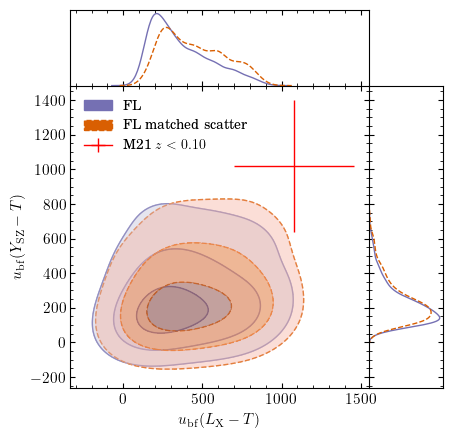

In [46]:
# ---------------------------------------------------------------------------- #
#                                Plot for print                                #
# ---------------------------------------------------------------------------- #ß
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('./nice.mplstyle')



zmax = 0.10
xrelation = 'LX-T'
xmask = (data['scaling_relation'] == xrelation) & (data['zmax'] == zmax)
xdata = data[xmask]
yrelation = 'YSZ-T'
ymask = (data['scaling_relation'] == yrelation) & (data['zmax'] == zmax)
ydata = data[ymask]

data = pd.merge(xdata, ydata, on='Lightcone')


# Define custom colors and linestyles
palette = ['#7570b3', '#d95f02']
linestyles = ['solid', 'dashed']
type_order = data['Type_x'].unique()  # or manually define if needed: ['no scatter', 'with scatter']
color_dict = dict(zip(type_order, palette))
ls_dict = dict(zip(type_order, linestyles))



# Create the 2D KDE plot
g = sns.JointGrid(data=data,
                  x='ubf_x',
                  y='ubf_y',
                  space=0,
                  ratio=4,
                  hue='Type_x',
                  # marginal_ticks=True,
                  height=4.5,
                  # dpi=300
                  )

# Plot line contours
for t in type_order:
    subset = data[data['Type_x'] == t]
    sns.kdeplot(
        data=subset,
        x='ubf_x',
        y='ubf_y',
        ax=g.ax_joint,
        fill=False,
        levels=(0.011, 0.14, 0.61, 1.),
        bw_adjust=2.5,
        zorder=1,
        color=color_dict[t],
        linestyles=ls_dict[t],
        label=t
    )

# Plot filled contours (same color, but with alpha)
for t in type_order:
    subset = data[data['Type_x'] == t]
    sns.kdeplot(
        data=subset,
        x='ubf_x',
        y='ubf_y',
        ax=g.ax_joint,
        fill=True,
        levels=(0.011, 0.14, 0.61, 1.),
        bw_adjust=2.5,
        alpha=0.4,
        zorder=2,
        color=color_dict[t]
    )

for t in type_order:
    subset = data[data['Type_x'] == t]
    sns.kdeplot(
        data=subset,
        x='ubf_x',
        ax=g.ax_marg_x,
        fill=False,
        common_norm=False,
        color=color_dict[t],
        linestyle=ls_dict[t],
    )
    sns.kdeplot(
        data=subset,
        y='ubf_y',
        ax=g.ax_marg_y,
        fill=False,
        common_norm=False,
        color=color_dict[t],
        linestyle=ls_dict[t],
    )


# g.ax_marg_x.set_yscale('log')
# g.ax_marg_y.set_xscale('log')

# M21 results
x_point = 1080
y_point = 1020
# g.refline(x=x_point, y=y_point, linestyle='dashdot', color=contour_color, zorder=3)
erb = g.ax_joint.errorbar(x=1080, 
                    y=1020,
                    xerr=380,
                    yerr=380, 
                    fmt='',
                    color='red', 
                    label='M21 $z<0.10$', 
                    zorder=10)

# Also add the box for the marginal plots
g.ax_marg_x.spines['top'].set_visible(True)
g.ax_marg_x.spines['right'].set_visible(True)
g.ax_marg_x.spines['left'].set_visible(True)
g.ax_marg_x.spines['bottom'].set_visible(True)

g.ax_marg_y.spines['top'].set_visible(True)
g.ax_marg_y.spines['right'].set_visible(True)
g.ax_marg_y.spines['left'].set_visible(True)
g.ax_marg_y.spines['bottom'].set_visible(True)

# matplotlib doesn't detect the contour correctly, adding it manually
import matplotlib.patches as mpatches
contour1 = mpatches.Patch(color=palette[0], linestyle=linestyles[0], label='FL')
contour2 = mpatches.Patch(color=palette[1], linestyle=linestyles[1], label='FL matched scatter')

# Add to the legend
g.ax_joint.legend(handles=[contour1, contour2, erb], loc='upper left', fontsize=10)
# plt.legend()

g.set_axis_labels(xlabel='$u_\mathrm{bf} (L_\mathrm{X}-T)$', ylabel='$u_\mathrm{bf} (Y_\mathrm{SZ}-T)$')
# plt.savefig('./to_paper/bfmc_hist_LTYTMT.pdf', bbox_inches='tight')

# Show the plot
plt.show()